In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
data.columns
plt.rcParams['font.family'] = 'Malgun Gothic'

## 가설1 . 2015~2018년 시즌보다 2019년 이후의 시즌은 타율, 출루, 장타는 감소하였을 것이다.

데이터 확인

In [71]:
data = pd.read_csv("./baseball.csv")


data

,순,이름,연도,WAR,-,타석,타수,득점,안타,2루타,...,희생타,희생플라이,타율,출루,장타,OPS,wOBA,wRC+,WAR2,--
0,1,삼성,97,38.92,1511,4976,4305,722,1194,254,...,88,32,0.277,0.356,0.462,0.819,0.359,124.0,38.92,NaN
1,2,삼성,93,38.88,1667,5000,4369,613,1169,169,...,53,38,0.268,0.344,0.408,0.752,0.349,126.9,38.88,NaN
2,3,LG,94,38.57,1541,4886,4265,655,1204,205,...,54,41,0.282,0.358,0.409,0.767,0.352,123.6,38.57,NaN
3,4,현대,0,38.53,1633,5240,4478,777,1245,246,...,74,46,0.278,0.365,0.483,0.849,0.369,119.2,38.53,NaN
4,5,삼성,2,38.22,1599,5304,4648,777,1321,266,...,55,34,0.284,0.360,0.472,0.831,0.362,122.7,38.22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,339,롯데,2,8.23,1757,4986,4512,463,1105,206,...,49,22,0.245,0.305,0.356,0.661,0.295,76.7,8.23,NaN
339,340,쌍방울,99,7.43,1639,5054,4462,523,1108,177,...,76,33,0.248,0.320,0.358,0.678,0.303,71.9,7.43,NaN
340,341,삼미,82,6.11,867,2954,2653,302,637,117,...,33,17,0.240,0.304,0.345,0.648,0.298,79.0,6.11,NaN
341,342,KIA,15,5.51,2022,5454,4777,648,1197,223,...,79,43,0.251,0.326,0.392,0.718,0.320,79.0,5.51,NaN


In [72]:
data.columns

Index(['순', '이름', '연도', 'WAR', '-', '타석', '타수', '득점', '안타', '2루타', '3루타', '홈런',
       '루타', '타점', '도루', '도루실패', '볼넷', '사구', '고의사구', '삼진', '병살', '희생타',
       '희생플라이', '타율', '출루', '장타', 'OPS', 'wOBA', 'wRC+', 'WAR2', '--'],
      dtype='object')

공인구가 도입된 2015년부터 반발계수가 하락하지 않은 2018년의 데이터와
반발계수가 하락한 2019년이후의 데이터를 구분한다.

In [73]:
# 살펴볼 타격 지표인 타율 출루 장타 삼진 병살을 추출
data2 = data[['이름', '연도','타율', '출루', '장타']]
data2

# 2015~2018시즌의 타격 지표와 2019~2022시즌의 타격 지표
data2_before = data2[(data2['연도'] >= 15) & (data['연도'] <= 18)]

data2_after = data2[(data2['연도'] >= 19) & (data['연도'] <= 22)]

data2_all = data2[(data2['연도'] >= 15) & (data['연도'] <= 22)]


data2

,이름,연도,타율,출루,장타
0,삼성,97,0.277,0.356,0.462
1,삼성,93,0.268,0.344,0.408
2,LG,94,0.282,0.358,0.409
3,현대,0,0.278,0.365,0.483
4,삼성,2,0.284,0.360,0.472
...,...,...,...,...,...
338,롯데,2,0.245,0.305,0.356
339,쌍방울,99,0.248,0.320,0.358
340,삼미,82,0.240,0.304,0.345
341,KIA,15,0.251,0.326,0.392


우선 연도별로 알아보기 위해 연도에 따라 그룹을 나눈 뒤 평균을 구한다. 

In [103]:
mean_data2 = data2_all.groupby(['연도'], as_index=False).mean()
mean_data2

,연도,타율,출루,장타
0,15,0.2795,0.3562,0.4299
1,16,0.2895,0.3640,0.4372
2,17,0.2858,0.3529,0.4379
3,18,0.2854,0.3528,0.4494
4,19,0.2670,0.3370,0.3844
5,20,0.2727,0.3485,0.4088
6,21,0.2594,0.3463,0.3828
7,22,0.2595,0.3333,0.3790


subplot을 통해 연도별 타율, 출루율, 장타율의 평균을 선 그래프로 그려 변화를 비교한다. 

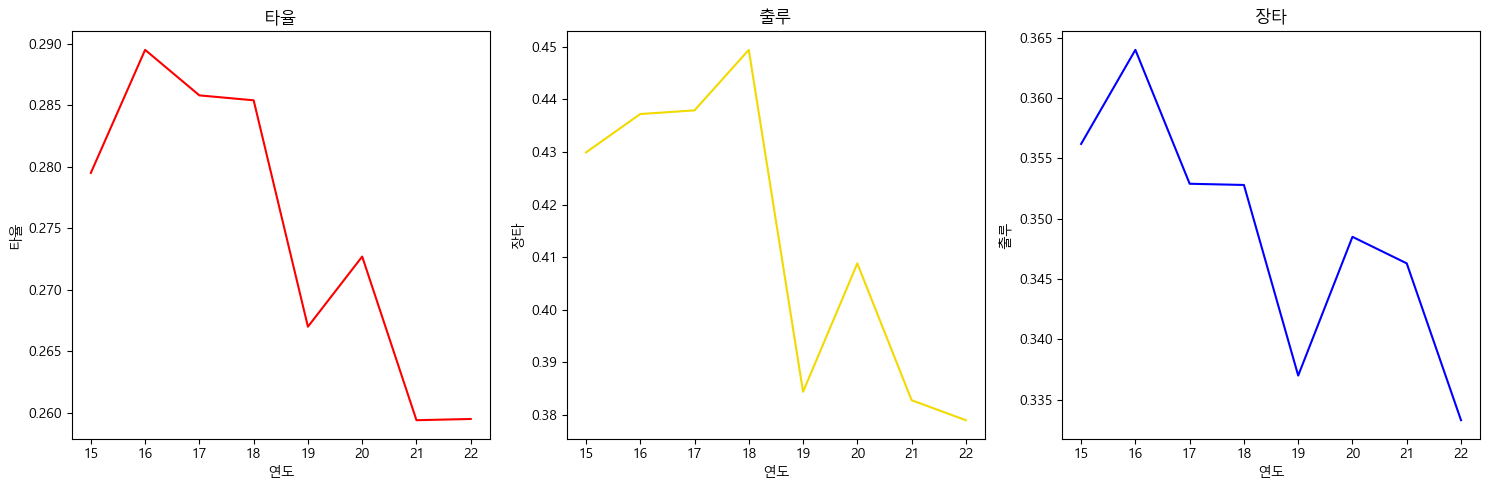

In [186]:



# 그래프 크기 설정
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# 첫 번째 서브플롯에 선 그래프 그리기
sns.lineplot(x=mean_data2['연도'], y=mean_data2['타율'], ax=ax[0], color='#fc0000')
ax[0].set_title('타율')

# 두 번째 서브플롯에 선 그래프 그리기
sns.lineplot(x=mean_data2['연도'], y=mean_data2['출루'], ax=ax[2], color='#0000ff')
ax[1].set_title('출루')

# 세 번째 서브플롯에 선 그래프 그리기
sns.lineplot(x=mean_data2['연도'], y=mean_data2['장타'], ax=ax[1], color='#f2da00')
ax[2].set_title('장타')


# X 축 눈금 및 라벨 설정
for axis in ax:
    axis.set_xticks(mean_data2['연도'])
    axis.set_xticklabels(mean_data2['연도'])

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()


반발계수 변화 후와 전의 타격지표를 막대 그래프로 비교한다.

Text(0.5, 1.0, '장타')

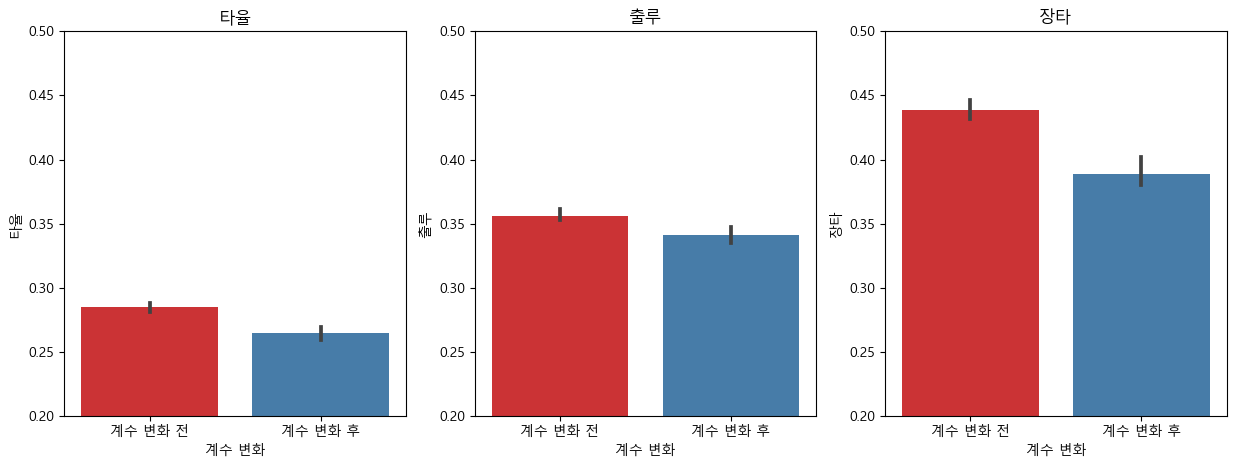

In [184]:
mean_data2

mean_data2['계수 변화'] = mean_data2['연도'].apply(lambda x : '계수 변화 전' if x <= 18 else "계수 변화 후" )

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x = '계수 변화',y = "타율", data = mean_data2, ax = ax[0], palette="Set1")
ax[0].set_ylim(0.200, 0.500)
ax[0].set_title('타율')

sns.barplot(x = '계수 변화',y = "출루", data = mean_data2, ax = ax[1], palette="Set1")
ax[1].set_ylim(0.200, 0.500)
ax[1].set_title('출루')

sns.barplot(x = '계수 변화',y = "장타", data = mean_data2, ax = ax[2], palette="Set1")
ax[2].set_ylim(0.200, 0.500)
ax[2].set_title('장타')